# Group Project:(draft version)

Members: Tracy Gan, Zihua Li, Xinya Lu, Matilda Lucas

## I. Introduction

## II. Analysis

### A. Exploratory data analysis

In [1]:
#load all the libraries
library(car)
library(ggplot2)
library(reshape2)
library(tidyverse)
library(broom)
library(caret)
library(RColorBrewer)
library(leaps)

Loading required package: carData

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::recode() masks car::recode()
✖ purrr::some()   masks car::some()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In our analysis, we aim to model student performance as the response variable. The initial dataset includes performance scores from two periods, G1 and G2. However, some students have a score of zero in one of these periods, indicating they were absent. To ensure the accuracy of our analysis, we created a new variable, G1_G2_Average, which represents the average performance across both periods. We also removed data for students who were absent in one period, as their absences should not influence the measure of student performance.

In [2]:
# load the dataset
data <- read.csv("dataset.csv")
head(data, 3)
cat("Table 1. Preview of the High School Alcoholism and Academic Performance dataset.\n")

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,no,4,3,4,1,1,3,4,0,11
2,GP,F,17,U,GT3,T,1,1,at_home,other,⋯,no,5,3,3,1,1,3,2,9,11
3,GP,F,15,U,LE3,T,1,1,at_home,other,⋯,no,4,3,2,2,3,3,6,12,13


Table 1. Preview of the High School Alcoholism and Academic Performance dataset.


In [3]:
# clean the dataset, and store the clean dataset
missing_summary <- sapply(data, function(x) sum(is.na(x)))
data[is.na(data)] <- lapply(data[is.na(data)], function(x) ifelse(is.numeric(x), median(x, na.rm = TRUE), "unknown"))
                            
# Add a new column 'G1_G2_Average' that is the average of G1 and G2
data$G1_G2_Average <- rowMeans(data[c("G1", "G2")], na.rm = TRUE)

# Remove rows where either G1 or G2 is equal to 0
data <- subset(data, G1 != 0 & G2 != 0)
head(data)
cat("Table 2. Preview of the cleaned High School Alcoholism and Academic Performance dataset.\n")

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G1_G2_Average
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
2,GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,2,9,11,10.0
3,GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,6,12,13,12.5
4,GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,0,14,14,14.0
5,GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,0,11,13,12.0
6,GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,6,12,12,12.0
7,GP,M,16,U,LE3,T,2,2,other,other,⋯,4,4,4,1,1,3,0,13,12,12.5


Table 2. Preview of the cleaned High School Alcoholism and Academic Performance dataset.


Figure 1. Distribution of average of G1 and G2.


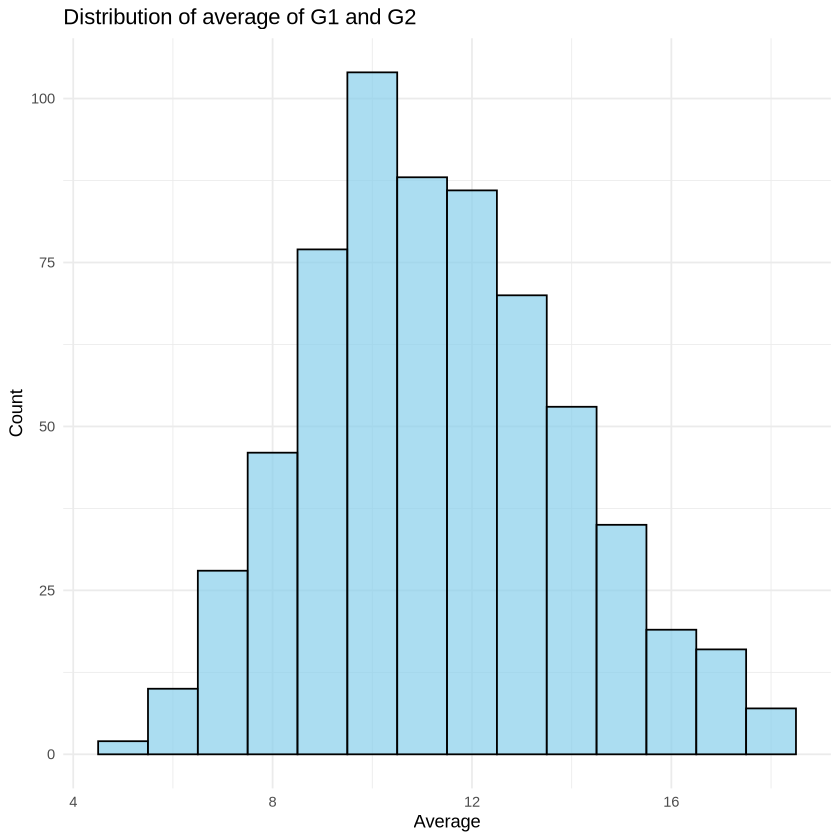

In [4]:
# Distribution histogram of the Average of G1 and G2
hist <- ggplot(data, aes(x = G1_G2_Average)) +
  geom_histogram(binwidth = 1, fill = "skyblue", color = "black", alpha = 0.7) +
  labs(title = "Distribution of average of G1 and G2", x = "Average", y = "Count") +
  theme_minimal()
hist
cat("Figure 1. Distribution of average of G1 and G2.\n")

Figure 1 illustrates how the average grades are continuously distributed. We can see most grades concentrated around the center and there is no outliers or invalid data after we clean our dataset.

In [5]:
# initialize the model
full_model <- lm(G1_G2_Average ~ .-G1-G2, data = data)
summary(full_model)


Call:
lm(formula = G1_G2_Average ~ . - G1 - G2, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8037 -1.4276 -0.1096  1.3945  7.5635 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      10.25261    1.61028   6.367 3.83e-10 ***
schoolMS         -0.97179    0.21946  -4.428 1.13e-05 ***
sexM             -0.64166    0.20452  -3.137 0.001788 ** 
age              -0.01470    0.08141  -0.181 0.856744    
addressU          0.14781    0.21591   0.685 0.493847    
famsizeLE3        0.28564    0.20048   1.425 0.154728    
PstatusT          0.01231    0.28805   0.043 0.965939    
Medu              0.19076    0.12394   1.539 0.124314    
Fedu              0.10750    0.11248   0.956 0.339567    
Mjobhealth        0.25098    0.43903   0.572 0.567750    
Mjobother         0.01770    0.24978   0.071 0.943522    
Mjobservices      0.11691    0.30721   0.381 0.703667    
Mjobteacher       0.37899    0.41381   0.916 0.360106    
Fjobhealth       


Figure 2. Correlation heatmap.


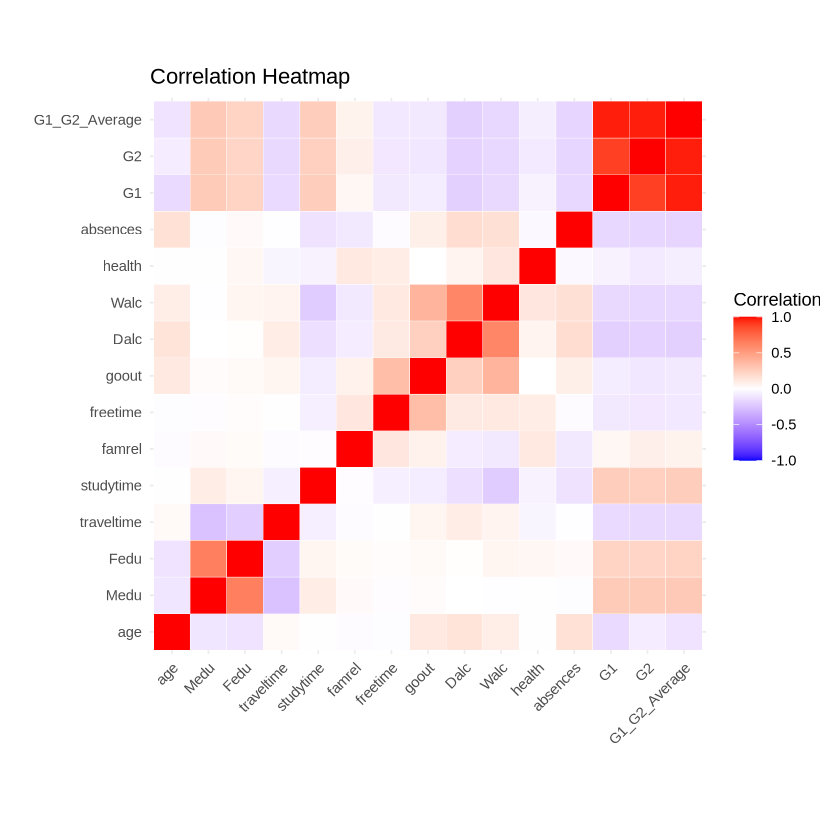

In [6]:
#setup the covariance matrix
cor_matrix <- cor(data[, sapply(data, is.numeric)], use = "complete.obs")
#print(cor_matrix)
cor_data <- melt(cor_matrix)
ggplot(cor_data, aes(Var1, Var2, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1, 1), space = "Lab", 
                       name = "Correlation") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  coord_fixed() +
  labs(title = "Correlation Heatmap", x = "", y = "")
cat("\nFigure 2. Correlation heatmap.\n")

Figure 2 uses a color gradient to represent the strength and direction of correlations. We can see Medu, Fedu, and studytime might has a stronger correlation with G1_G2_Average.


Figure 3. Residual plot for full model.


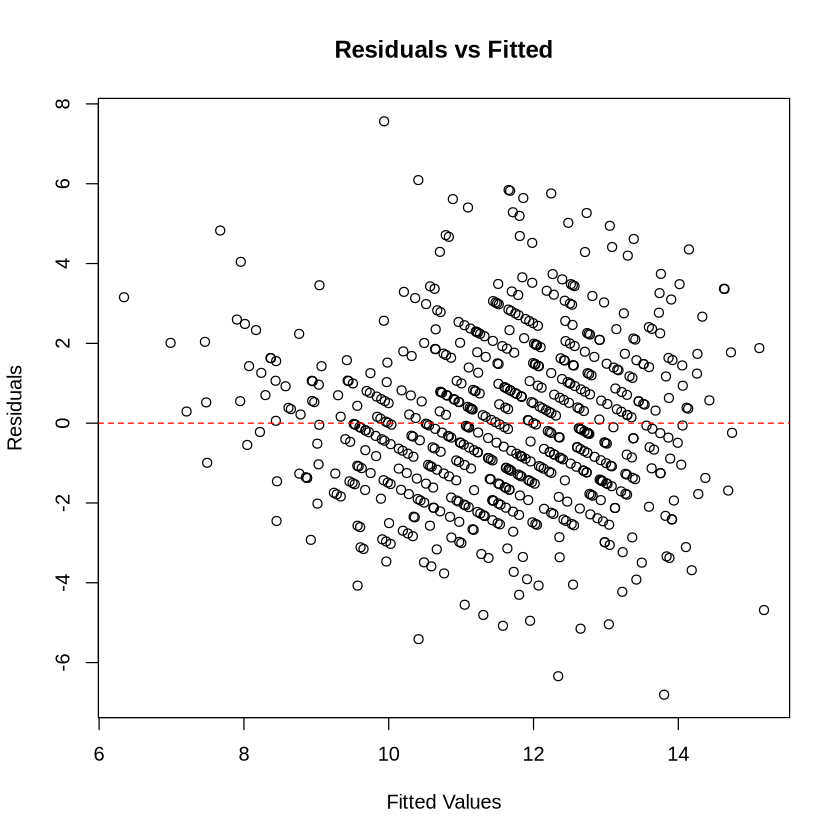

In [7]:
# residual plot again fitted values for full model
plot(full_model$fitted.values, residuals(full_model),
     xlab = "Fitted Values",
     ylab = "Residuals",
     main = "Residuals vs Fitted")
abline(h = 0, col = "red", lty = 2)
cat("\nFigure 3. Residual plot for full model.\n")

Based on Figure 3, the assumption of constant variance might be violated, as the plot appears to have a funnel-shaped pattern.


Figure 4. Q-Q plot for full model.


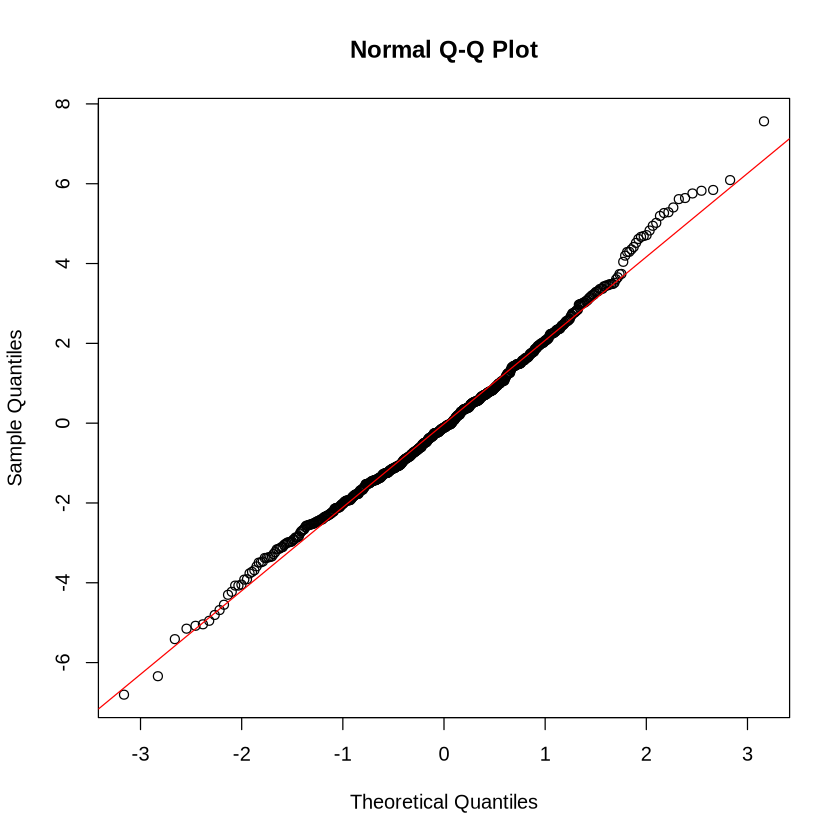

In [8]:
# QQ-plot for full model
qqnorm(residuals(full_model))
qqline(residuals(full_model), col = "red")
cat("\nFigure 4. Q-Q plot for full model.\n")

Based on Figure 4, the residuals of the full model appear to follow a normal distribution.

In [9]:
# get the VIF values
vif_values <- vif(full_model)
print(vif_values)

               GVIF Df GVIF^(1/(2*Df))
school     1.468436  1        1.211790
sex        1.371876  1        1.171271
age        1.323619  1        1.150486
address    1.329733  1        1.153141
famsize    1.139622  1        1.067531
Pstatus    1.188740  1        1.090293
Medu       2.670563  1        1.634186
Fedu       2.074944  1        1.440467
Mjob       2.586037  4        1.126106
Fjob       1.879394  4        1.082062
reason     1.436266  3        1.062199
guardian   1.426866  2        1.092939
traveltime 1.294327  1        1.137685
studytime  1.218453  1        1.103836
schoolsup  1.123830  1        1.060108
famsup     1.122169  1        1.059325
paid       1.093694  1        1.045798
activities 1.137683  1        1.066622
nursery    1.066634  1        1.032780
higher     1.216373  1        1.102893
internet   1.227334  1        1.107851
romantic   1.116361  1        1.056580
famrel     1.119786  1        1.058199
freetime   1.256851  1        1.121094
goout      1.442530  1   

VIF quantifies how much multicollinearity inflates the variance of a regression coefficient. From the calculated VIF values, no variable exceeds a value of 5, suggesting that multicollinearity is unlikely to be a concern in the model.

In [10]:
#split data
data <- 
    data %>% 
    mutate(id = row_number())

training_data <- 
    data %>% 
    slice_sample(prop = 0.70, replace = FALSE)

testing_data <- 
    data %>%
    anti_join(training_data, by = "id") %>%
    select(-"id")

training_data <- 
    training_data %>% 
    select(-"id")

To select the most appropriate covariates for our model, we will perform backward selection. First, we will split the data into a training set and a testing set. The training set will be used for the backward selection process, while the testing set will be used to build and evaluate the final model.

In [11]:
#backward selection to choose the covariates
your_backward_sel <- regsubsets(
  x = G1_G2_Average ~ .-G1-G2,  
  nvmax = 4,       
  data = training_data,         
  method = "backward"          
)

your_backward_sel

your_bwd_summary <- summary(your_backward_sel)

your_bwd_summary_df <- tibble(
  n_input_variables = 1:4,          
  R2 = your_bwd_summary$rsq,
  RSS = your_bwd_summary$rss,
  ADJ.R2 = your_bwd_summary$adjr2,
  BIC = your_bwd_summary$bic,
  Cp = your_bwd_summary$cp
)

your_bwd_summary_df
your_bwd_summary

Subset selection object
Call: regsubsets.formula(x = G1_G2_Average ~ . - G1 - G2, nvmax = 4, 
    data = training_data, method = "backward")
38 Variables  (and intercept)
                 Forced in Forced out
schoolMS             FALSE      FALSE
sexM                 FALSE      FALSE
age                  FALSE      FALSE
addressU             FALSE      FALSE
famsizeLE3           FALSE      FALSE
PstatusT             FALSE      FALSE
Medu                 FALSE      FALSE
Fedu                 FALSE      FALSE
Mjobhealth           FALSE      FALSE
Mjobother            FALSE      FALSE
Mjobservices         FALSE      FALSE
Mjobteacher          FALSE      FALSE
Fjobhealth           FALSE      FALSE
Fjobother            FALSE      FALSE
Fjobservices         FALSE      FALSE
Fjobteacher          FALSE      FALSE
reasonhome           FALSE      FALSE
reasonother          FALSE      FALSE
reasonreputation     FALSE      FALSE
guardianmother       FALSE      FALSE
guardianother        FALSE     

n_input_variables,R2,RSS,ADJ.R2,BIC,Cp
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.1182153,2719.479,0.1162382,-44.15210,102.26355
2,0.1663075,2571.160,0.1625606,-63.17264,74.47052
3,0.1980091,2473.390,0.1925902,-74.43561,56.83148
4,0.2217655,2400.124,0.2147386,-81.80190,44.11443


Subset selection object
Call: regsubsets.formula(x = G1_G2_Average ~ . - G1 - G2, nvmax = 4, 
    data = training_data, method = "backward")
38 Variables  (and intercept)
                 Forced in Forced out
schoolMS             FALSE      FALSE
sexM                 FALSE      FALSE
age                  FALSE      FALSE
addressU             FALSE      FALSE
famsizeLE3           FALSE      FALSE
PstatusT             FALSE      FALSE
Medu                 FALSE      FALSE
Fedu                 FALSE      FALSE
Mjobhealth           FALSE      FALSE
Mjobother            FALSE      FALSE
Mjobservices         FALSE      FALSE
Mjobteacher          FALSE      FALSE
Fjobhealth           FALSE      FALSE
Fjobother            FALSE      FALSE
Fjobservices         FALSE      FALSE
Fjobteacher          FALSE      FALSE
reasonhome           FALSE      FALSE
reasonother          FALSE      FALSE
reasonreputation     FALSE      FALSE
guardianmother       FALSE      FALSE
guardianother        FALSE     

Based on the result of backward selection, we will use student's school (school), mother's education level (Medu) , individual desire to purse a degree or not (higher), and number of school absences (absence) as our explantory variables

In [12]:
# linear model with no transformation
model <- lm(G1_G2_Average ~ school + Medu + higher + absences, data = testing_data)
summary(model)


Call:
lm(formula = G1_G2_Average ~ school + Medu + higher + absences, 
    data = testing_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.0978 -1.5978 -0.1435  1.4267  5.7567 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.11087    0.73601  12.379  < 2e-16 ***
schoolMS    -0.92013    0.38361  -2.399 0.017436 *  
Medu         0.44362    0.15382   2.884 0.004385 ** 
higheryes    2.21250    0.57263   3.864 0.000154 ***
absences    -0.10861    0.04618  -2.352 0.019715 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.24 on 188 degrees of freedom
Multiple R-squared:  0.232,	Adjusted R-squared:  0.2156 
F-statistic:  14.2 on 4 and 188 DF,  p-value: 3.828e-10


Then we create a linear model between the avarage student performance and the four covariates that we choose.


Figure 5. Q-Q plot for actual model.


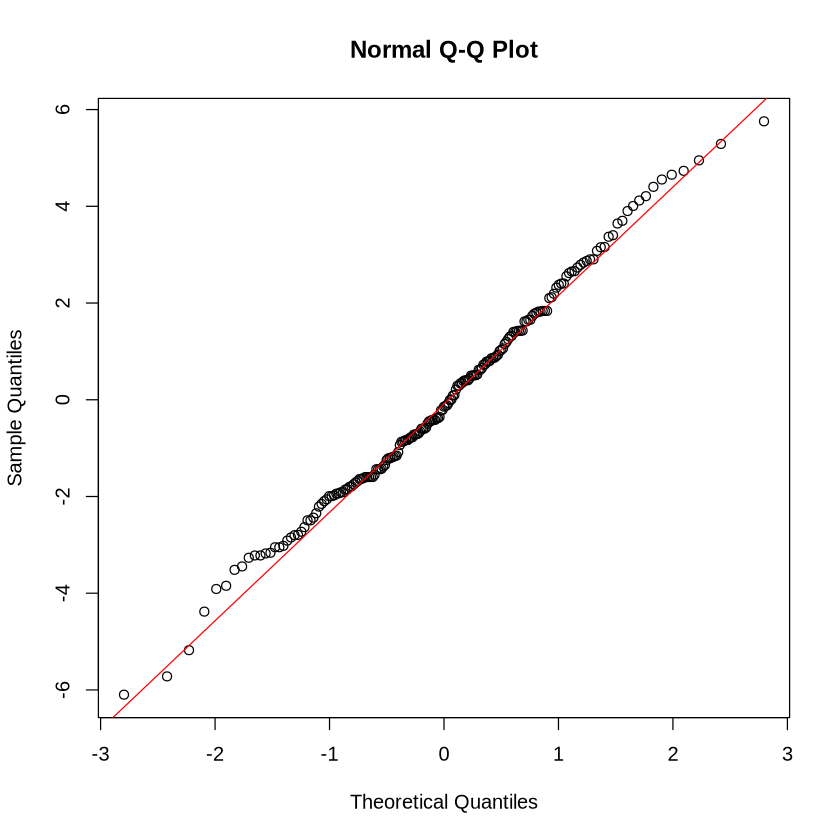

In [13]:
qqnorm(residuals(model))
qqline(residuals(model), col = "red")
cat("\nFigure 5. Q-Q plot for actual model.\n")

Based on Figure 5, the residuals of our actual model appear to follow a normal distribution.


Figure 6. Residual plot for actual model.


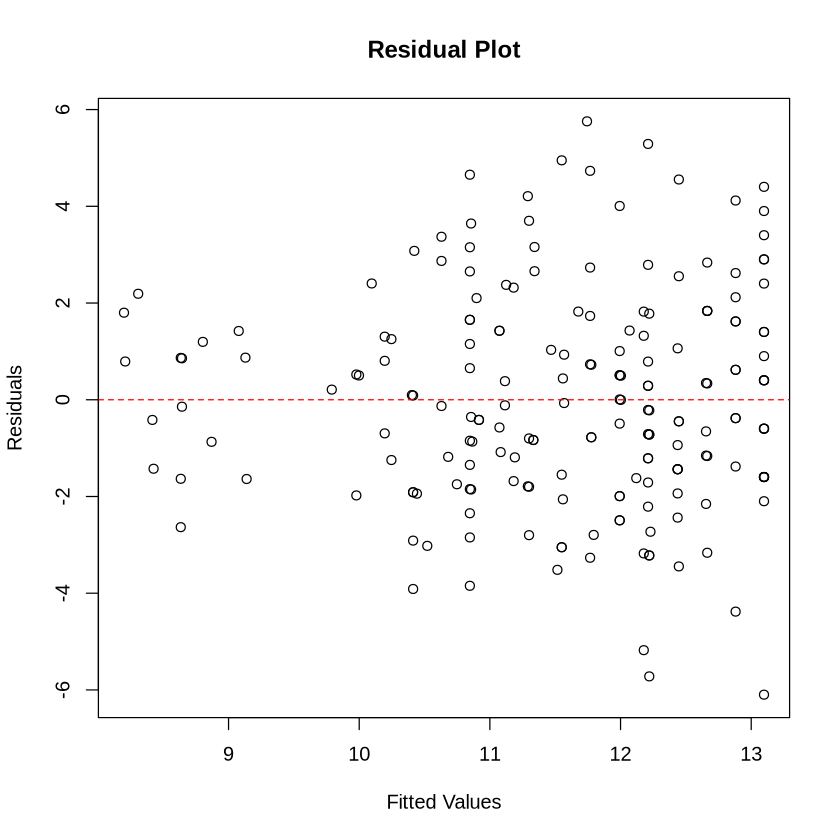

In [14]:
plot(model$fitted.values, residuals(model), 
     xlab = "Fitted Values", 
     ylab = "Residuals", 
     main = "Residual Plot")
abline(h = 0, col = "red", lty = 2)
cat("\nFigure 6. Residual plot for actual model.\n")

Based on Figure 6, the residual plot for the fitted model indicates that the constant variance assumption is likely violated. To address this issue, we decided to apply a log transformation to the fitted values.

In [15]:
# linear model with log transformation
model2 <- lm(log(G1_G2_Average) ~ school + Medu + higher + absences, data = testing_data)
summary(model)


Call:
lm(formula = G1_G2_Average ~ school + Medu + higher + absences, 
    data = testing_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.0978 -1.5978 -0.1435  1.4267  5.7567 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.11087    0.73601  12.379  < 2e-16 ***
schoolMS    -0.92013    0.38361  -2.399 0.017436 *  
Medu         0.44362    0.15382   2.884 0.004385 ** 
higheryes    2.21250    0.57263   3.864 0.000154 ***
absences    -0.10861    0.04618  -2.352 0.019715 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.24 on 188 degrees of freedom
Multiple R-squared:  0.232,	Adjusted R-squared:  0.2156 
F-statistic:  14.2 on 4 and 188 DF,  p-value: 3.828e-10



Figure 7. Residual plot for log-transformed model.


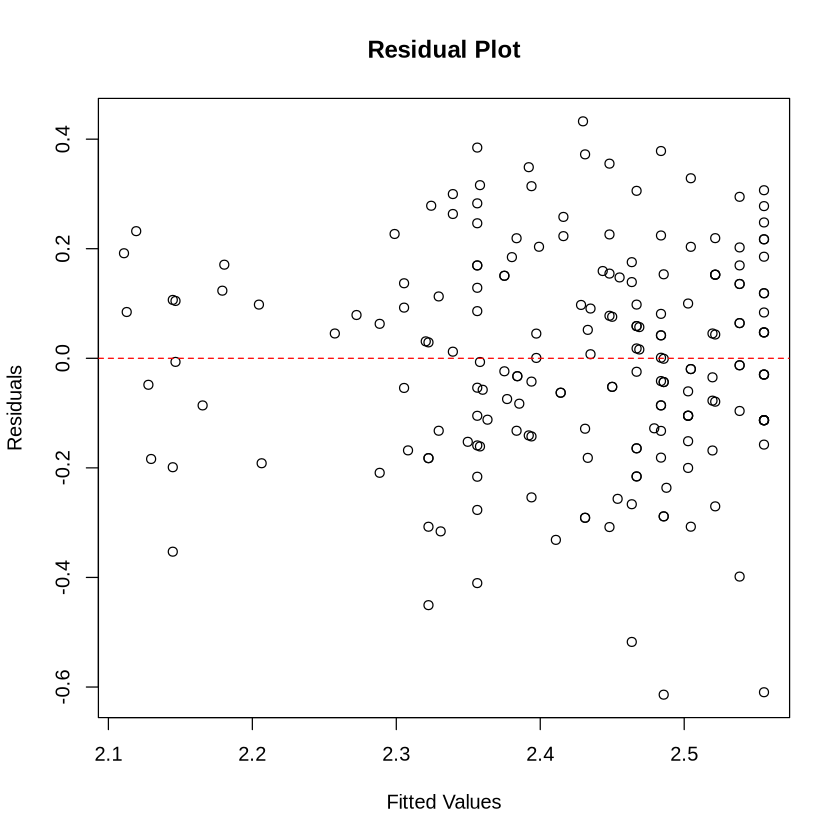

In [17]:
plot(model2$fitted.values, residuals(model2), 
     xlab = "Fitted Values", 
     ylab = "Residuals", 
     main = "Residual Plot")
abline(h = 0, col = "red", lty = 2)
cat("\nFigure 7. Residual plot for log-transformed model.\n")


Figure 8. Residual plot for log-transformed model.


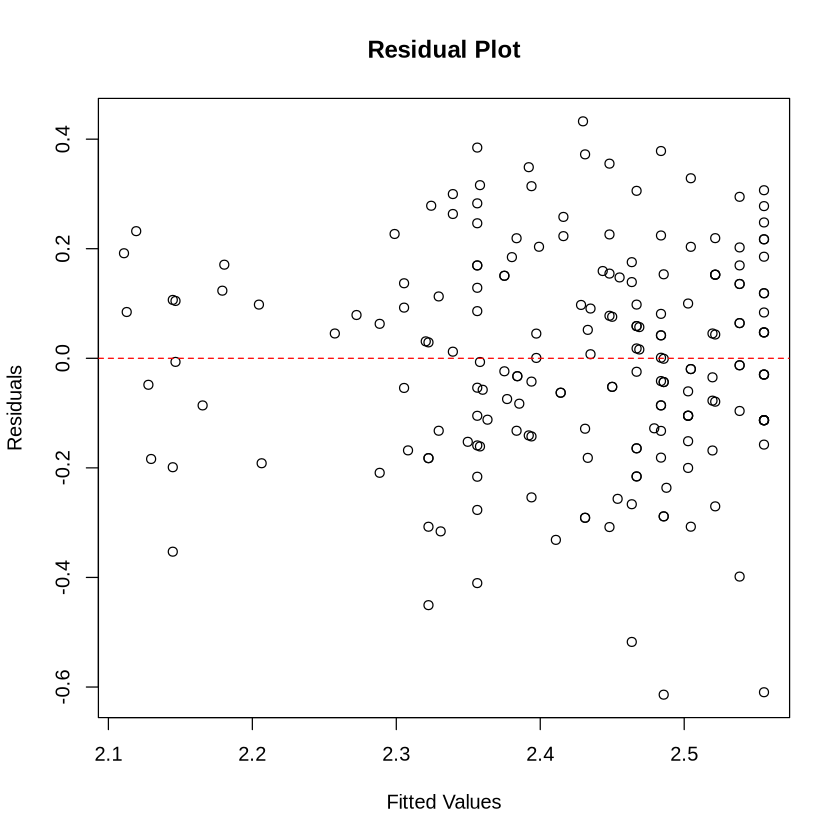

In [18]:
plot(model2$fitted.values, residuals(model2), 
     xlab = "Fitted Values", 
     ylab = "Residuals", 
     main = "Residual Plot")
abline(h = 0, col = "red", lty = 2)
cat("\nFigure 8. Residual plot for log-transformed model.\n")

After applying the log transformation to the model, the model fit improved significantly. The new residual plot shows that the residuals are more randomly scattered around the zero line, indicating a better fit.

## III. Conclusion

The objective of this analysis was to build an inferential model to investigate whether social and educational factors influence academic performance, specifically the variable G1_G2_Average which represents the average academic performance of a student across both periods. Our results from performing backward selection suggests that the student's school (school), mother's education level (Medu), individual desire to purse a degree or not (higher), and number of school absences (absence) were important in influencing the students' academic performance. 

### Model fit

From the linear model fitted with these variables, we can see the plot of these models in Figure 5 and 6 showed us that our model is not an appropriate fit. Figure 5 ... Figure 6 showed presence of heteroscedasticity as there is fan-shaped pattern, violating a key assumption of constant variance of linear regression. Therefore we applied a log transformation of the predictor variable, resulting in a better fitted model as seen in Figure 7 as the assumptions of linear regression are met.  

From this model, we got an adjusted $R^2$ value of 0.167, meaning that our model explains 16.7% of the variance in log of (G1_G2_Average). Additionally, this adjusted $R^2$ value did not improve from log transformations in G1_G2_Average, indicating that the relationship between target and predictor might not have a log-linear relationship between them, however this log transformation is still an improvement as the residual plots showed scattered points. 

### Statistical Significance of Predictors
The summary of our model shows that all four variables are statistically significant at a critical value of 0.05, indicating to us that these four variables have a meaningful relationship with G1_G2_Average. Specifically,
*  schoolMS has a negative correlation with log(G1_G2_Average) with estimate -0.920. This implies that being in school MS (Mousinho da Silveira) as compared to school GP (Gabriel Pereira) is associated with a decrease in log(G1_G2_Average) by 0.92 when other variables are constant
*  Medu has a positive correlation of 0.444, implying that for a unit increase in Mother's educational level, the log(G1_G2_Average) increases by 0.444 units.
*  higherYes has a positive correlation of 2.21, implying that an increase in 2.21 units in log(G1_G2_Average) is observed for students planning to pursue a degree compared to those who are not interested.
*  absences has a negative correlation of 0.109, implying that every additional day of absences is associated with a decrease in log(G1_G2_Average) by 0.109 units.

### Implications

The findings from above suggests that higher maternal education and desire to pursue a degree are associated with a higher G1_G2_Average, meaning higher academic average performance of students, whilst increasing number of absences are associated with lower academic average of students. As school type also has a negative impact on the academic average, this points to a difference in outcomes of students in these different schools.

### Final Thoughts

In conclusion, although our model provides statistical significant results for all four predictors, the low $R^2$ value of 0.167 suggests that there might be other predictor variables influencing log(G1_G2_Average) that are not captured in our analysis. Further exploration and analysis of the predictor variables in the future may help with defining these relationships.

## IV. Appendix